In [1]:
## Importing all the necessary libraries 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import csv file which consist airline data
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
# To display top 5 rows we will use df.head()
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
## Info gives information like data type range etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
# checking null values
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
## calculating some statistical data like percentile, mean and std of the numerical values of dataframe
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* Here  as we can see that data in all the  columns except deprt delay in min , arrival delay in minutes are normally distributed.

### 1. Working on Satisfaction Column

In [7]:
# Value_counts returns the count of unique values.
df["satisfaction"].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

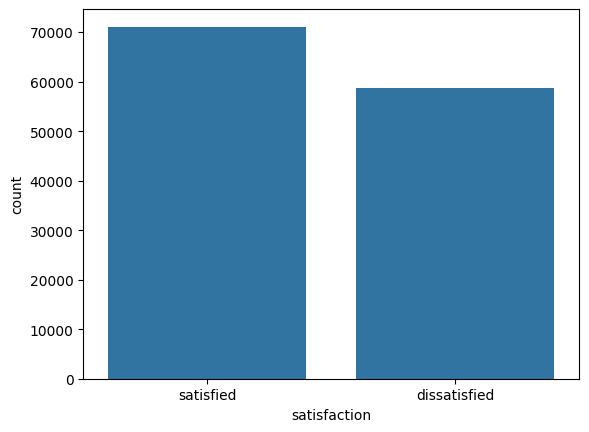

In [8]:
# Plotting countplot for satisfaction column.
# countplot() method is used to Show the counts of observations in each categorical bin using bars.
sns.countplot(x = df["satisfaction"])
plt.show()

### 2.Working on age column.(Numeric type of data)

In [9]:
## value_counts -> function returns a Series containing counts of unique values.
df["Age"].value_counts()

Age
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

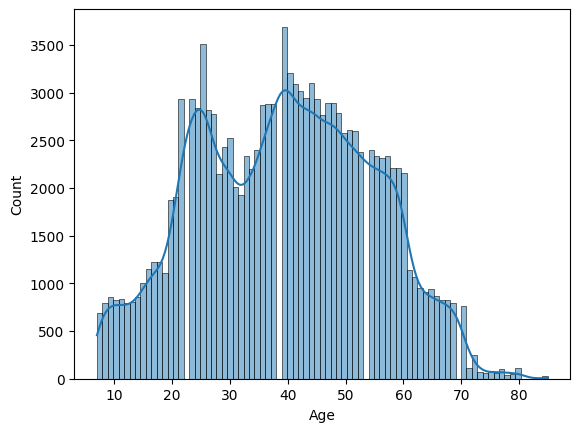

In [10]:
sns.histplot(df["Age"], kde=True)

<Axes: >

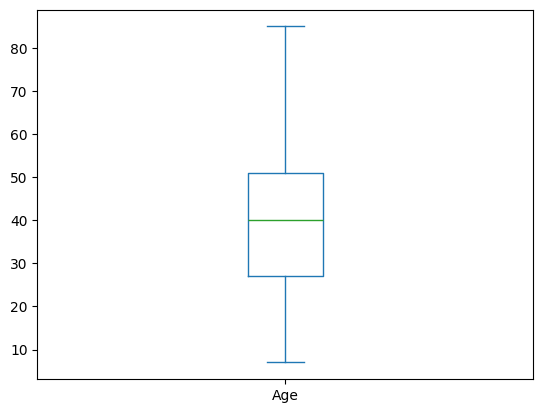

In [11]:
## Plotting box Plot for age column
df["Age"].plot.box()

* From the above box plot we can say that there are no outliers present and data is normally distributed.

### 3.Working on Gender column

In [12]:
## using value_counts function to get a Series containing counts of unique values.
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

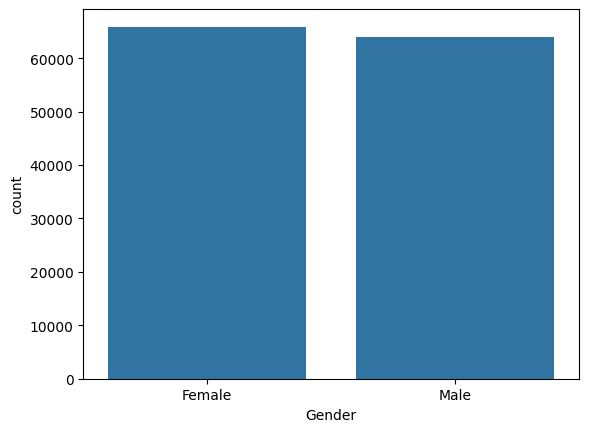

In [13]:
## Plotting countplot for gender column.
sns.countplot(x = df["Gender"])

In [14]:
## Using crosstab to check the relationship between two categorical value.
pd.crosstab(index = df["satisfaction"],columns=df["Gender"])

Gender,Female,Male
satisfaction,,
dissatisfied,22971,35822
satisfied,42928,28159


* using cross tab to comapre the result of satisfaction and gender column.

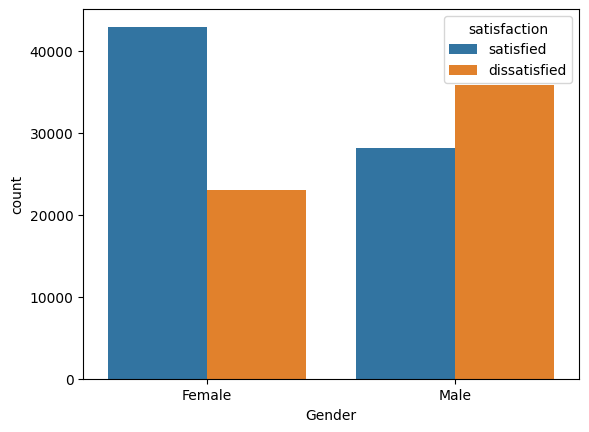

In [15]:
# Plotting count plot for Gender and satisfaction column
sns.countplot(df, x="Gender", hue="satisfaction")
plt.show()

### 4.Working on Customer Type

<Axes: xlabel='Customer Type', ylabel='count'>

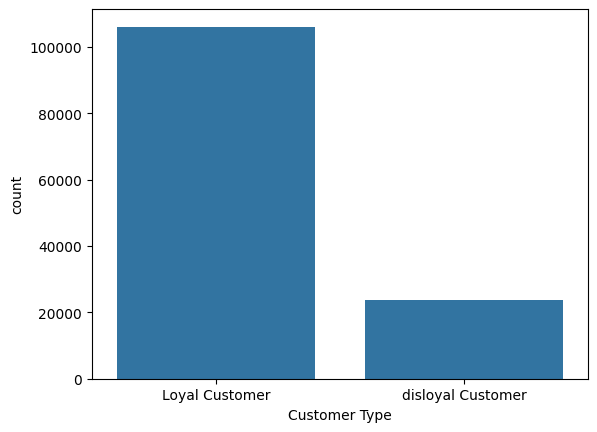

In [16]:
## plotting count plot for customer type column
sns.countplot(x = df["Customer Type"])

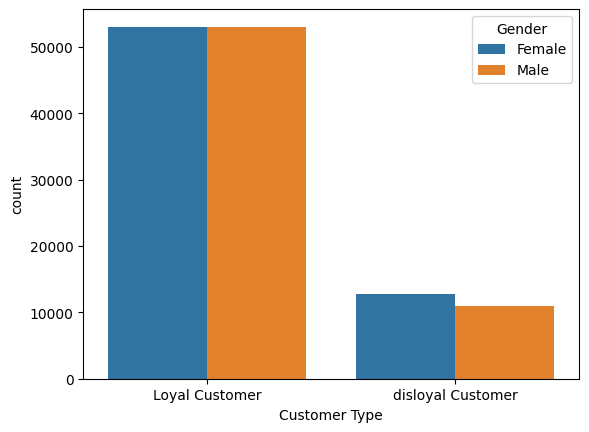

In [17]:
# Plotting count plot to count Passenger who are loyal and disloyal 
sns.countplot(df, x="Customer Type", hue="Gender")
plt.show()

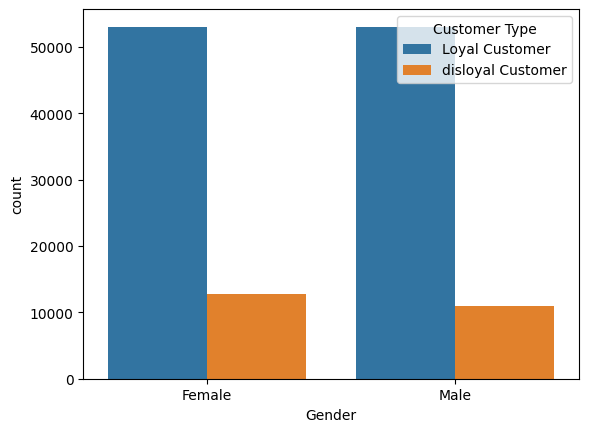

In [18]:
## Plotting countplot for gender and customer type column
sns.countplot(df, x="Gender", hue="Customer Type")
plt.show()

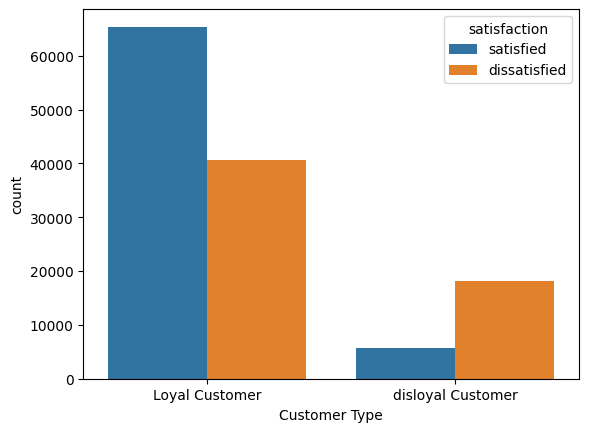

In [19]:
# counting loyal and disloyal customer on the basis of satisfied or dissatisfied. 
sns.countplot(df, x="Customer Type", hue="satisfaction")
plt.show()

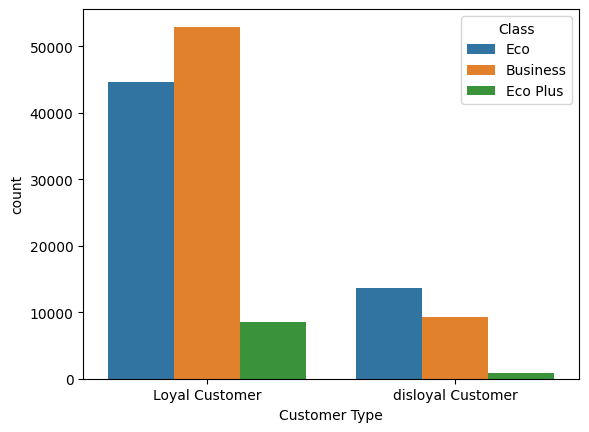

In [20]:
# Plotting count plot on the basis of customer type and their class 
sns.countplot(df, x="Customer Type", hue="Class")
plt.show()

### 5.Working on Type of Travel Column

<Axes: xlabel='Type of Travel', ylabel='count'>

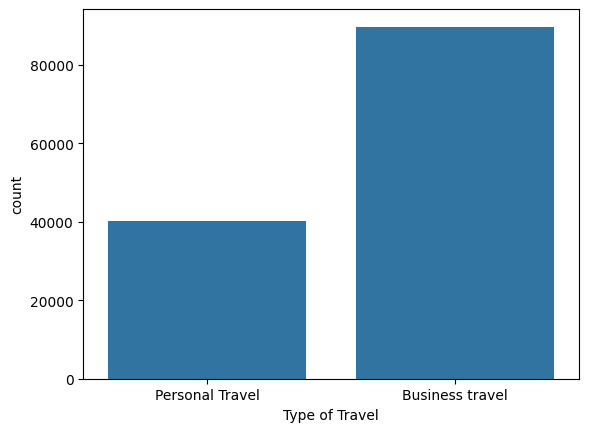

In [21]:
## Plotting count plot on the basis of type of travel
sns.countplot(x = df["Type of Travel"])

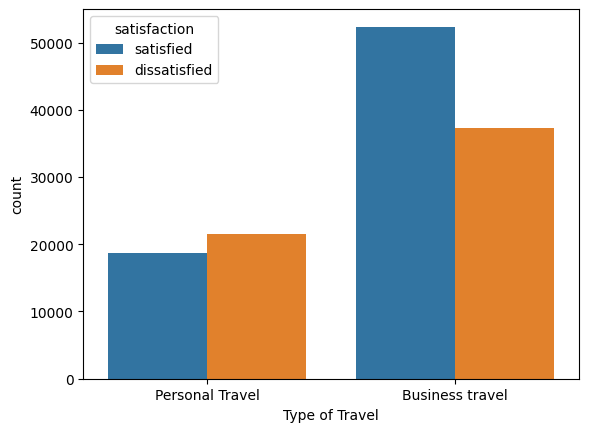

In [22]:
## plotting count plot on the basis of type of travel and satisfaction
sns.countplot(df, x="Type of Travel", hue="satisfaction")
plt.show()

* From the above countplot we can say that in personal travel that customer are more dissatisfied with their travelling experience and in business travel customer are more satisfied.

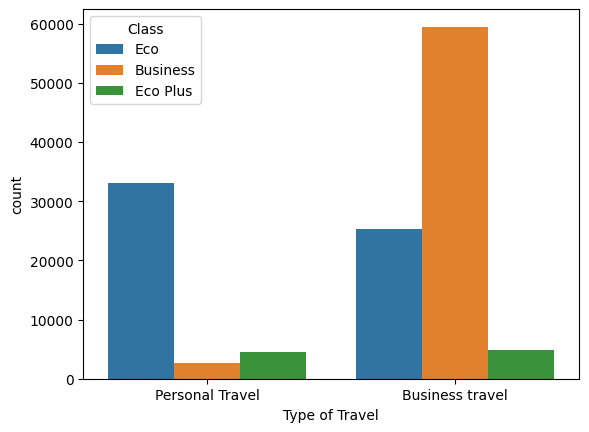

In [23]:
## Plotting count plot on the basis of travel type and class
sns.countplot(df, x="Type of Travel", hue="Class")
plt.show()

* From above count plot we can say that most of the people in personal travel prefer economy class and in business class most of the customer prefer business class.

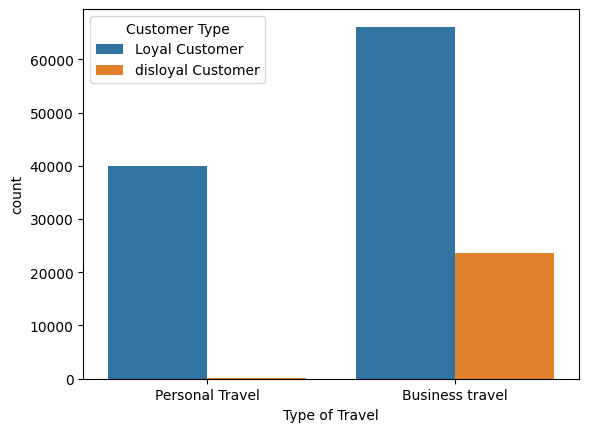

In [24]:
sns.countplot(df, x="Type of Travel", hue="Customer Type")
plt.show()

* From above countplot we can say that in personal travel the count of loyal customers are more and same in business travel.

### 6.Working with class column

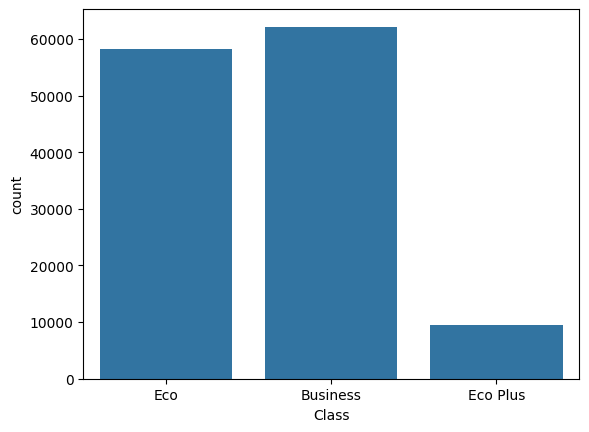

In [25]:
sns.countplot(x = df["Class"])
plt.show()

* From above countplot we can say that the count of business class is more/higher than other two classes.

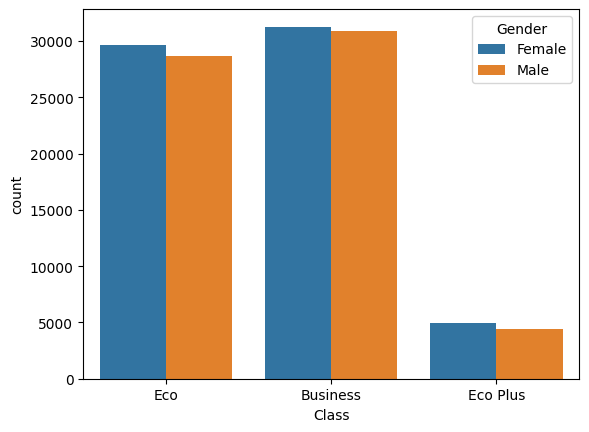

In [26]:
# plotting count plot on the basis of class and gender
sns.countplot(df, x="Class", hue="Gender")
plt.show()

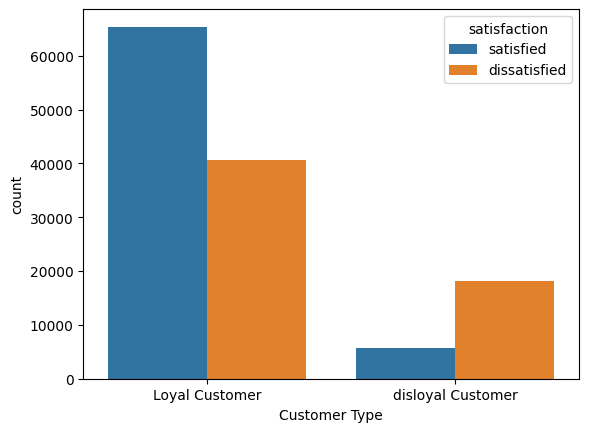

In [27]:
# plotting countplot on the basis of type of customer and if they are satisfied or dissatisfied.
sns.countplot(df, x="Customer Type", hue="satisfaction")
plt.show()

* From the above count plot we can see that loyal customers are satisfied with their travelling experience while disloyal customers are dissatisfied with their travelling experience.

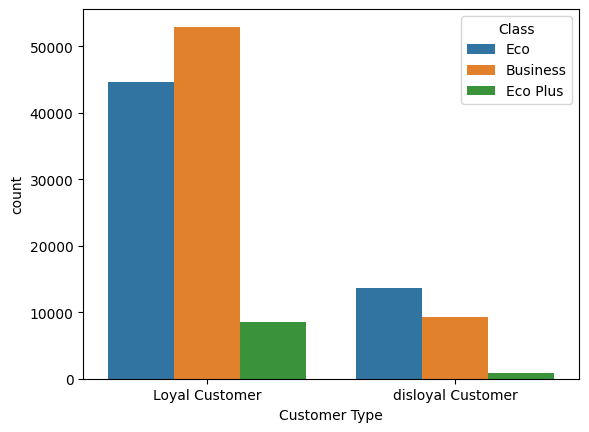

In [28]:
## Plotting count plot on the basis of customer type and preferred class.
sns.countplot(df, x="Customer Type", hue="Class")
plt.show()

* from above count plot we can say that loyal customer usually travel with business class and disloyal customers usually travel with economic class

#### working on numeric data 

### 7.Working on Flight Distance

<Axes: xlabel='Flight Distance', ylabel='Count'>

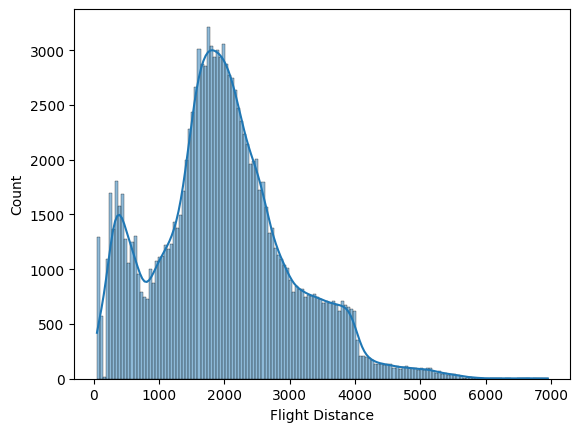

In [29]:
## Plotting hist plot for flight distance column.
sns.histplot(df["Flight Distance"], kde=True)

<Axes: >

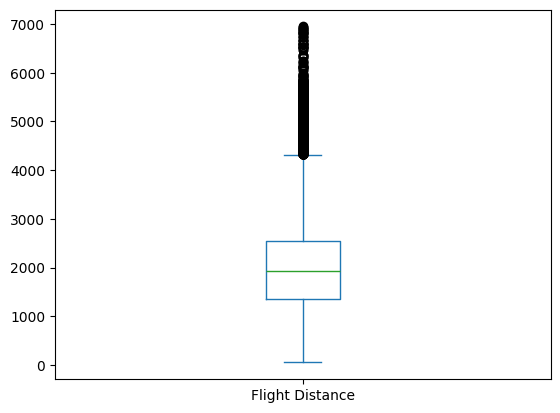

In [30]:
## Plotting box plot for flight distance to remove outliers. 
df["Flight Distance"].plot(kind = "box")

In [31]:
df["Flight Distance"].quantile(0.977)

4204.0

In [32]:
df = df[df["Flight Distance"] < df["Flight Distance"].quantile(.977)]

<Axes: >

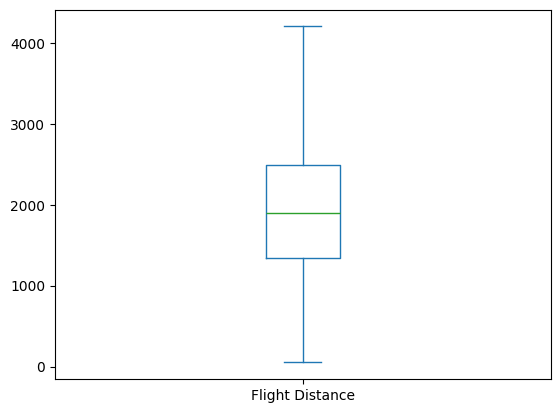

In [33]:
## Plotting box plot after removing outliers
df["Flight Distance"].plot(kind = "box")

In [34]:
## Checking shape of df
df.shape

(126888, 23)

### 8.Working on Seat Comfort column

In [35]:
## using value_counts function to get a Series containing counts of unique values.
df["Seat comfort"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
129874    5
129875    5
129876    2
129877    3
129878    3
Name: Seat comfort, Length: 126888, dtype: int64>

<Axes: xlabel='Seat comfort', ylabel='Count'>

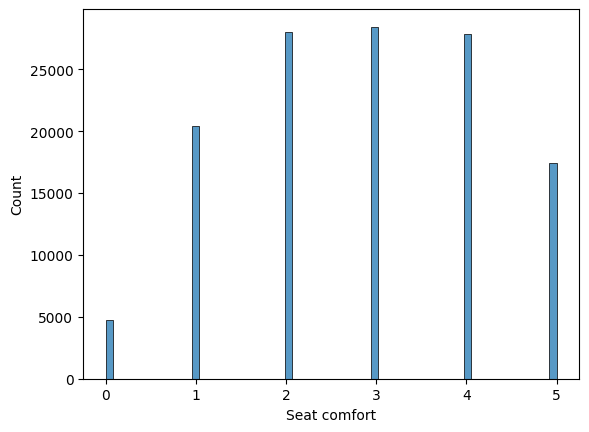

In [36]:
## Plotting hist plot for seat comfort column
sns.histplot(df["Seat comfort"])

<Axes: xlabel='Seat comfort', ylabel='count'>

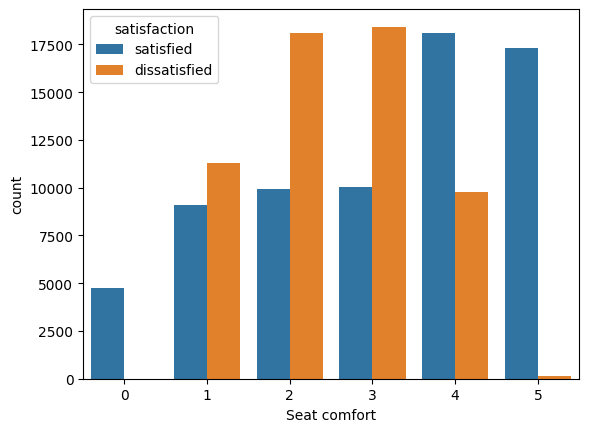

In [37]:
## Plotting count plot for seat comfort and satisfaction column
sns.countplot(x=df["Seat comfort"], hue=df["satisfaction"])

<Axes: >

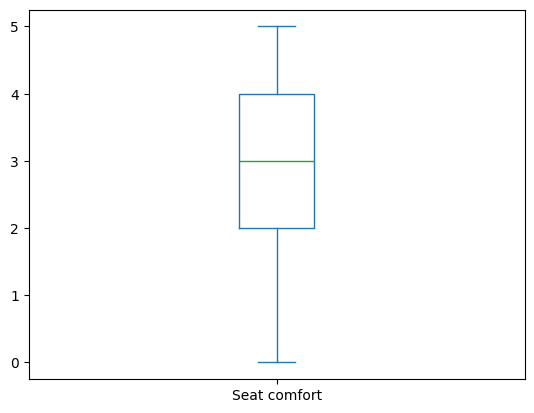

In [38]:
## Plotting box plot for seatcomfort column
df["Seat comfort"].plot(kind = "box")

### 10. Working on Deprt/Arr time convenient

In [39]:
## using value_counts function to get a Series containing counts of unique values.
df["Departure/Arrival time convenient"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
129874    5
129875    5
129876    3
129877    0
129878    2
Name: Departure/Arrival time convenient, Length: 126888, dtype: int64>

<Axes: xlabel='Departure/Arrival time convenient', ylabel='Count'>

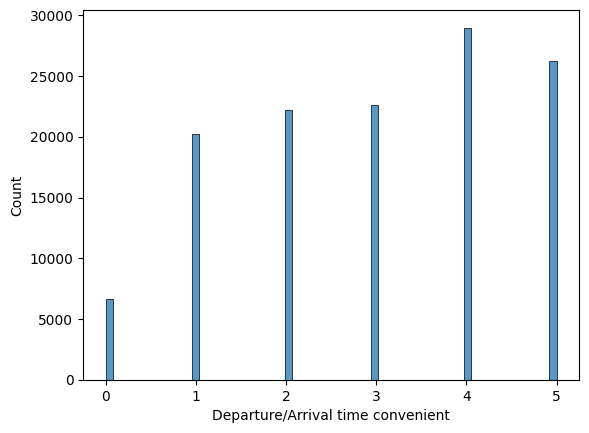

In [40]:
## Plotting histplot for departure and arrival time
sns.histplot(df["Departure/Arrival time convenient"])

<Axes: xlabel='Departure/Arrival time convenient', ylabel='count'>

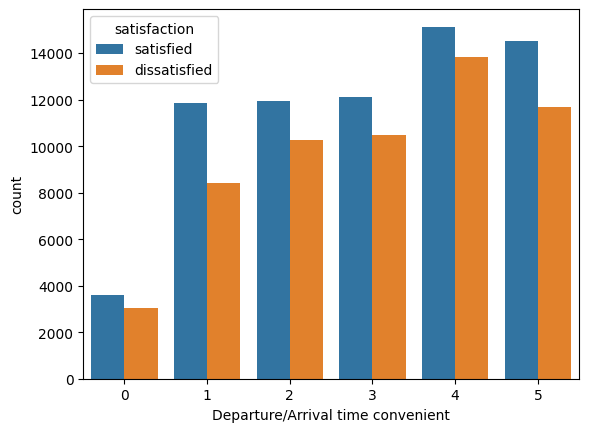

In [41]:
sns.countplot(x=df["Departure/Arrival time convenient"], hue=df["satisfaction"])

* From the above countplot we can say that most of the customers are satisfied with there departure/arrival time.

<Axes: >

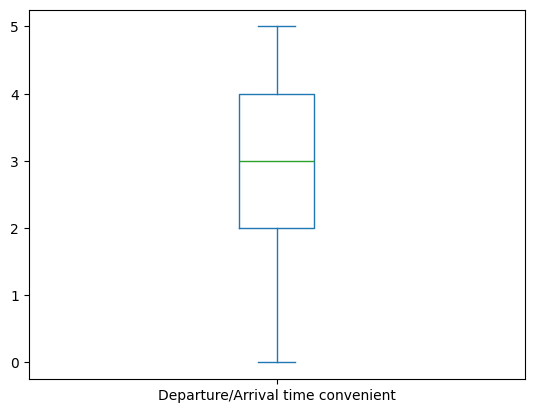

In [42]:
## Plotting box plot for departure/arrival time convenient
df["Departure/Arrival time convenient"].plot(kind = "box")

### 11. Working on Food and Drink Column

In [43]:
## using value_counts function to get a Series containing counts of unique values.
df["Food and drink"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
129874    5
129875    5
129876    2
129877    3
129878    3
Name: Food and drink, Length: 126888, dtype: int64>

<Axes: xlabel='Food and drink', ylabel='Count'>

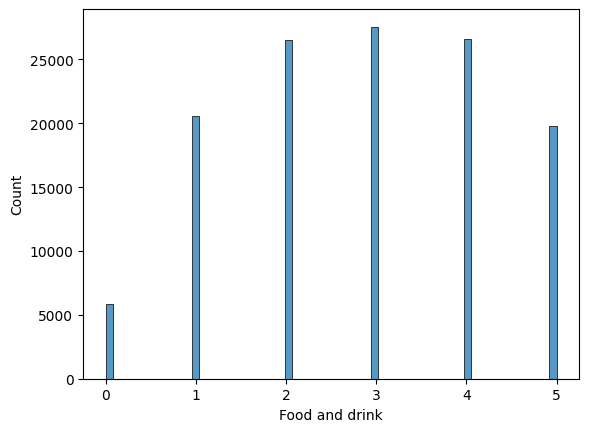

In [44]:
## Plotting histplot for online support to find distribution of a variable
# by counting the number of observations that fall within discrete bins.
sns.histplot(df["Food and drink"])

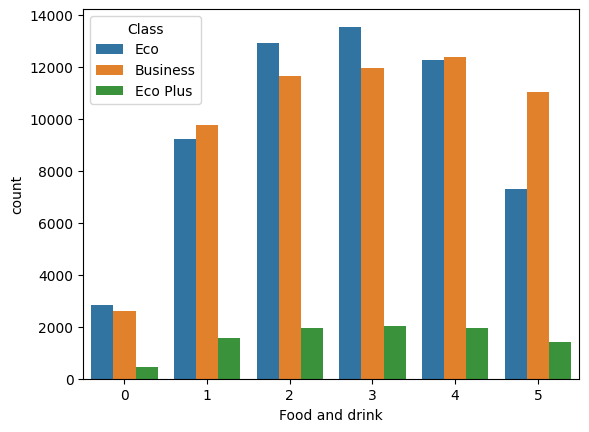

In [45]:
sns.countplot(df, x="Food and drink", hue="Class")
plt.show()

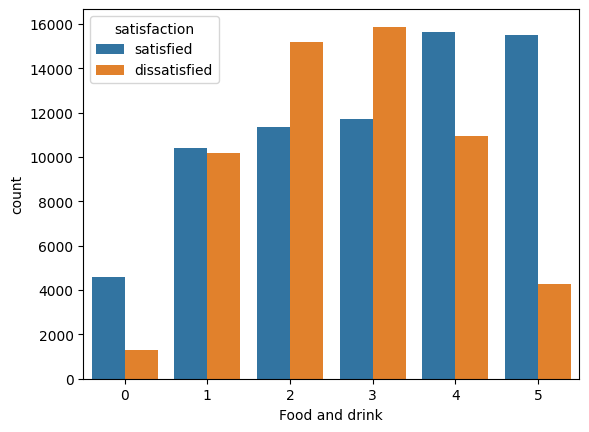

In [46]:
sns.countplot(df, x="Food and drink", hue="satisfaction")
plt.show()

* From the above countplot we can see that for satisfied customer has given mostly rating 4 and 5 and dissatisfied customer has given 2,3 rating.

<Axes: >

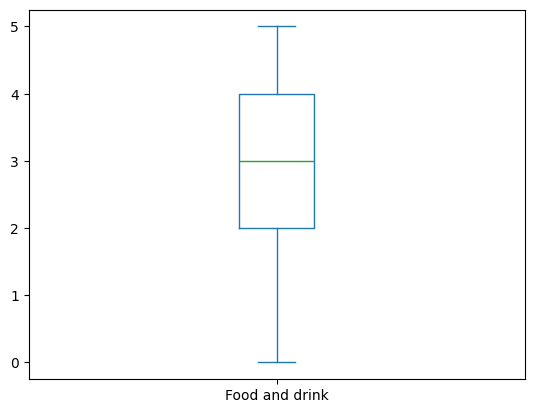

In [47]:
## Plotting box plot for food and drink column
df["Food and drink"].plot(kind = "box")

### 12. Working on Online Support

In [48]:
## using value_counts function to get a Series containing counts of unique values.
df["Online support"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2
1         2
2         2
3         3
4         4
         ..
129874    2
129875    2
129876    1
129877    2
129878    2
Name: Online support, Length: 126888, dtype: int64>

<Axes: xlabel='Online support', ylabel='Count'>

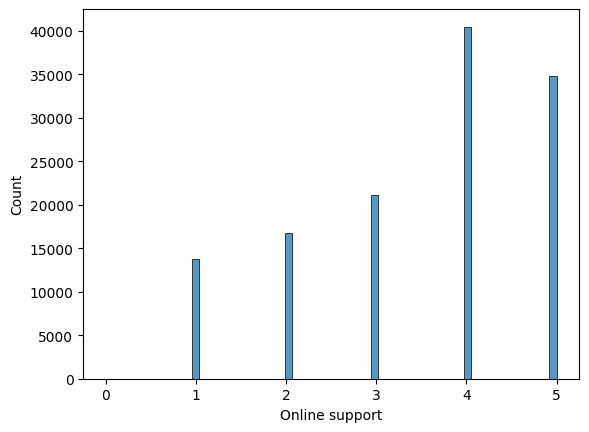

In [49]:
## Plotting histplot for online support to find distribution of a variable
# by counting the number of observations that fall within discrete bins.
sns.histplot(df["Online support"])

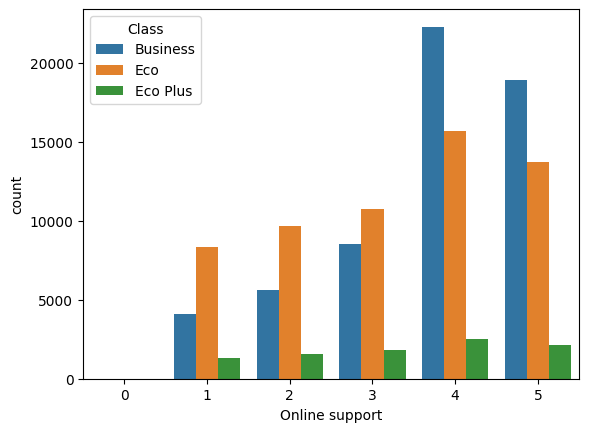

In [50]:
## Plotting countplot for online support and class
sns.countplot(df, x="Online support", hue="Class")
plt.show()

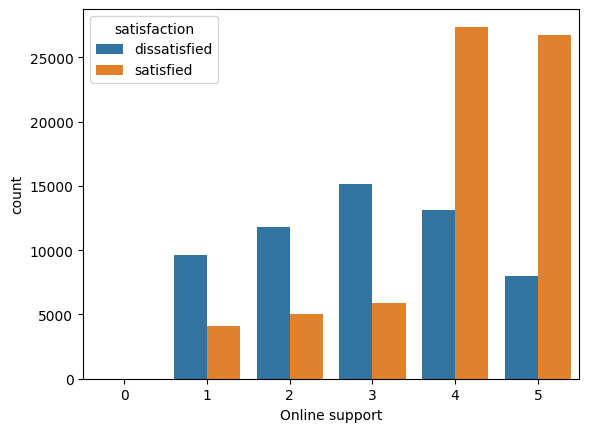

In [51]:
## Plotting countplot for online support and satisfaction 
sns.countplot(df, x="Online support", hue="satisfaction")
plt.show()

<Axes: >

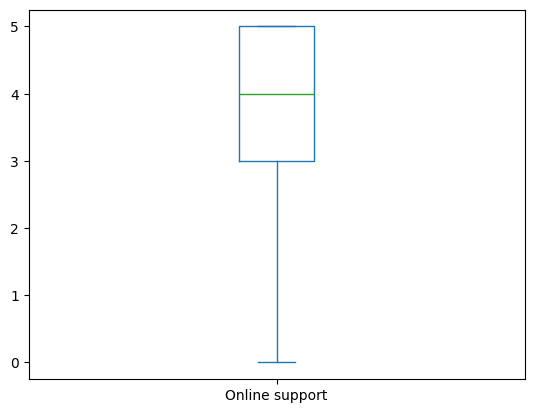

In [52]:
## Plotting box plot for online support
df["Online support"].plot(kind = "box")

In [53]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### 13. Working on Ease of online booking column

In [54]:
## using value_counts function to get a Series containing counts of unique values.
df["Ease of Online booking"].value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         3
2         2
3         1
4         2
         ..
129874    2
129875    2
129876    3
129877    4
129878    3
Name: Ease of Online booking, Length: 126888, dtype: int64>

<Axes: xlabel='Ease of Online booking', ylabel='Count'>

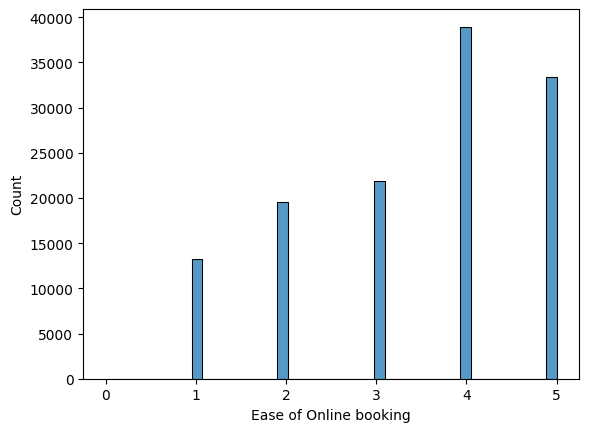

In [55]:
## Plotting histplot for online support to find distribution of a variable
# by counting the number of observations that fall within discrete bins.
sns.histplot(df["Ease of Online booking"])

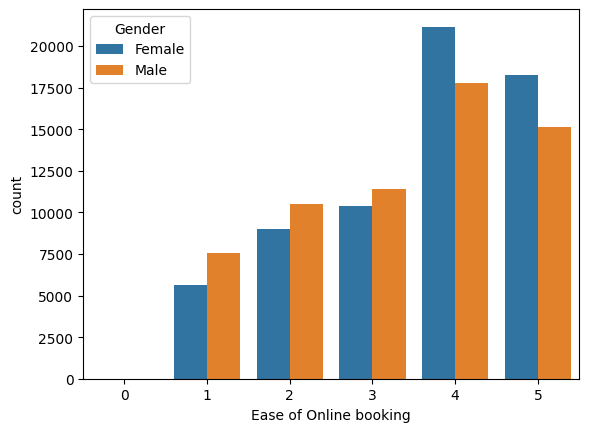

In [57]:
## Plotting count plot for ease of online booking and gender
sns.countplot(df, x="Ease of Online booking", hue="Gender")
plt.show()

<Axes: xlabel='Ease of Online booking', ylabel='count'>

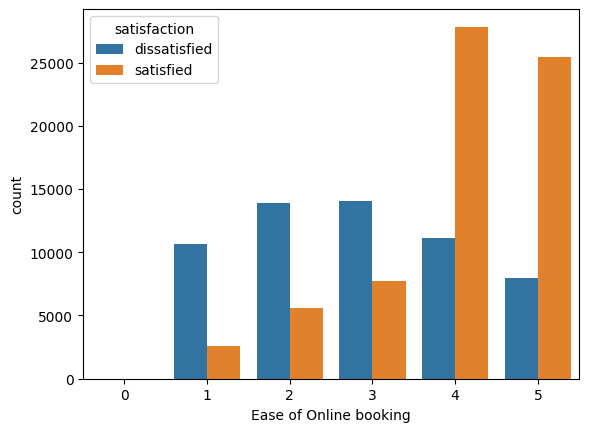

In [58]:
## Plotting countplot for ease of online booking and satifaction.
sns.countplot(x=df["Ease of Online booking"], hue=df["satisfaction"])

<Axes: >

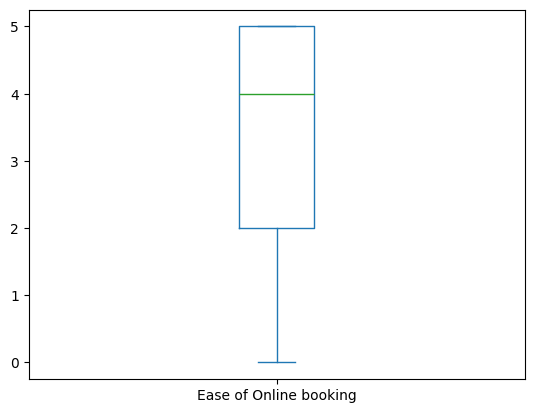

In [59]:
## Plotting box plot for ease of online booking
df["Ease of Online booking"].plot(kind = "box")

### 14. Working on On-board service column

In [60]:
## using value_counts function to get a Series containing counts of unique values.
df["On-board service"].value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         4
2         3
3         1
4         2
         ..
129874    3
129875    3
129876    2
129877    4
129878    3
Name: On-board service, Length: 126888, dtype: int64>

<Axes: xlabel='On-board service', ylabel='Count'>

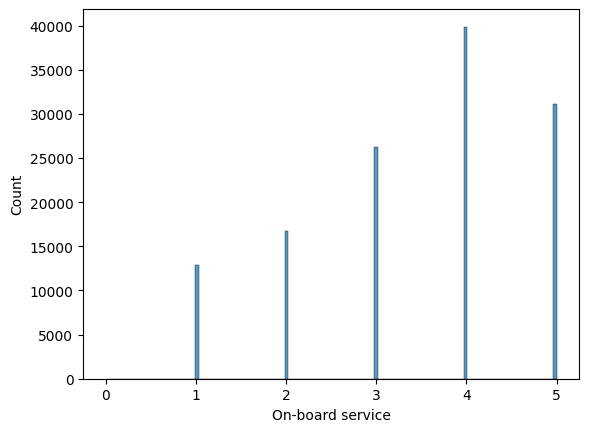

In [61]:
## Plotting histplot for online support to find distribution of a variable
# by counting the number of observations that fall within discrete bins.
sns.histplot(df["On-board service"])

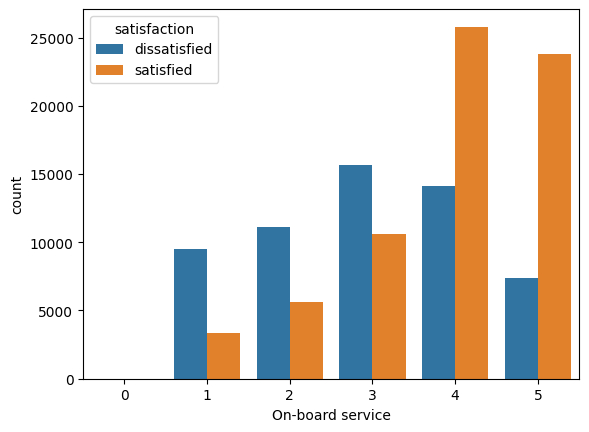

In [62]:
## Plotting count plot for on board service and satisfaction.
sns.countplot(df, x="On-board service", hue="satisfaction")
plt.show()

* From the above countplot we can say that customer who are satisied has given 4 and 5 rating and customers who are not satisfied has given 1,2,3 rating. 

<Axes: >

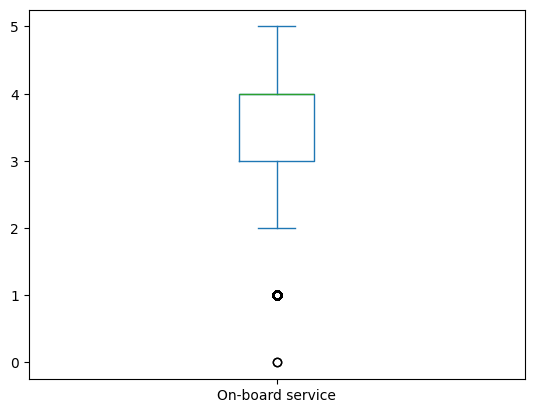

In [63]:
## plotting box plot for on board service.
df["On-board service"].plot(kind = "box")

### 15. Working on Leg room service column

In [64]:
## using value_counts function to get a Series containing counts of unique values.
df["Leg room service"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         4
2         3
3         0
4         0
         ..
129874    5
129875    3
129876    3
129877    3
129878    2
Name: Leg room service, Length: 126888, dtype: int64>

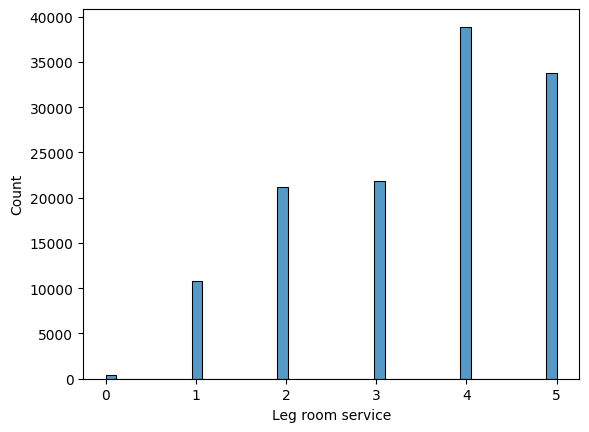

In [65]:
## plotting hist plot for leg room service
sns.histplot(df["Leg room service"])
plt.show()

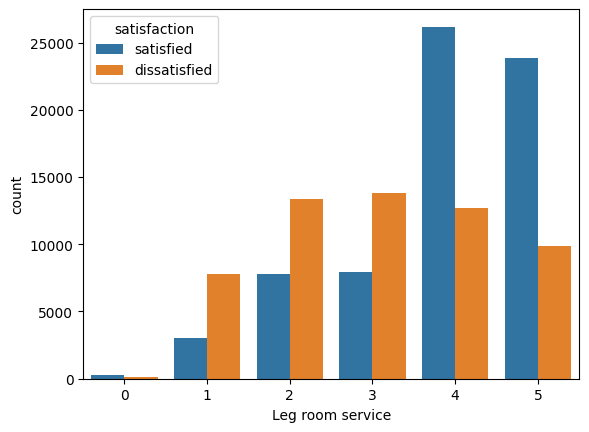

In [68]:
## Plotting count plot for leg room service and satisfaction
sns.countplot(df, x="Leg room service", hue="satisfaction")
plt.show()

* From the above count plot we can say that customers who are satisfied with leg room serive has given 4 and 5 rating and customers who are not satisfied has given 1,2,3 rating.

<Axes: >

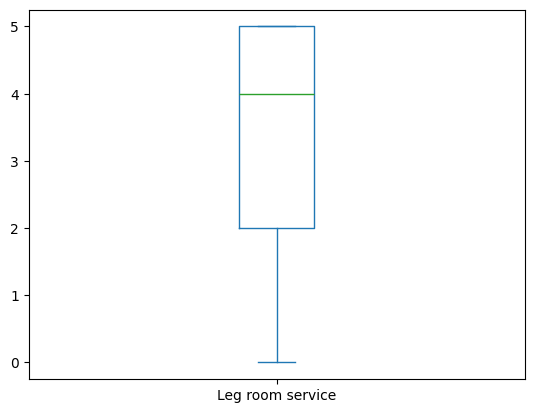

In [69]:
## Plotting box plot for leg room service column.
df["Leg room service"].plot(kind = "box")

### 16. Working on Baggage handling column

In [70]:
## using value_counts function to get a Series containing counts of unique values.
df["Baggage handling"].value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         4
2         4
3         1
4         2
         ..
129874    3
129875    4
129876    3
129877    4
129878    3
Name: Baggage handling, Length: 126888, dtype: int64>

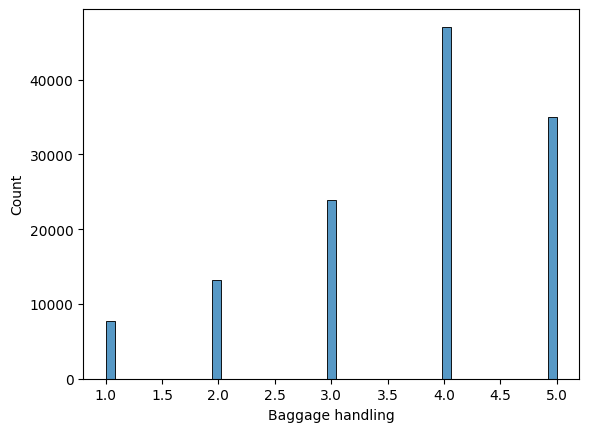

In [71]:
## Plotting hist plot for baggage handling a/c to rating given by customer.
sns.histplot(df["Baggage handling"])
plt.show()

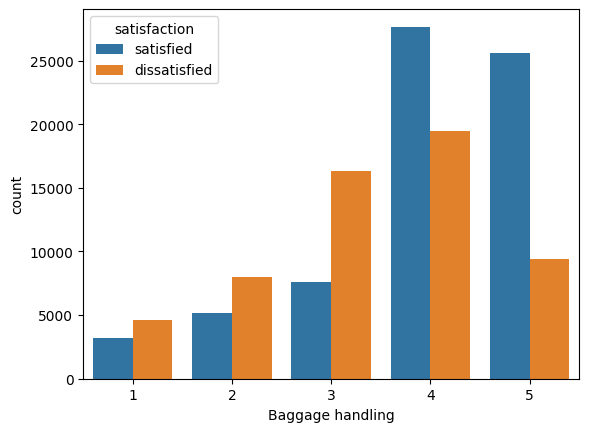

In [72]:
## Plottin count plot for baggage handling and satisfaction column
sns.countplot(df, x="Baggage handling", hue="satisfaction")
plt.show()

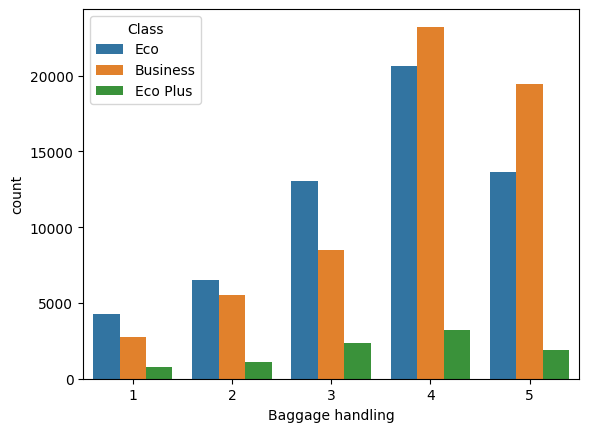

In [73]:
sns.countplot(df, x="Baggage handling", hue="Class")
plt.show()

* Customers from business class has given 4 and 5 rating, customers from Economic class has given 1,2,3 rating.

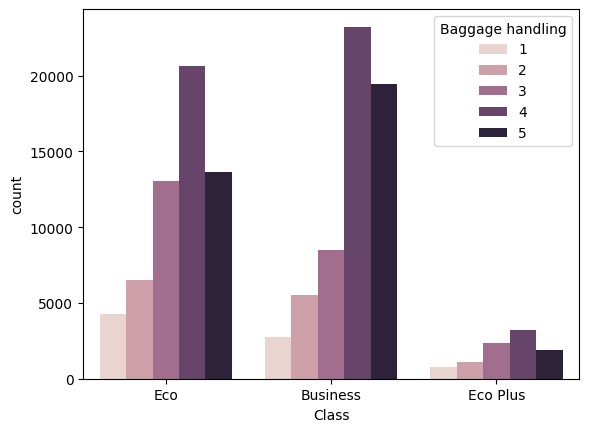

In [74]:
sns.countplot(df, x="Class", hue="Baggage handling")
plt.show()

<Axes: >

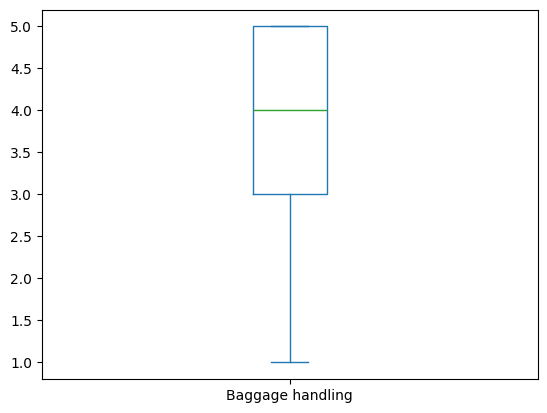

In [75]:
## Plotting box plot for baggage handling
df["Baggage handling"].plot(kind = "box")

### 17. Working on column Checking service

In [76]:
## using value_counts function to get a Series containing counts of unique values.
df["Checkin service"].value_counts

<bound method IndexOpsMixin.value_counts of 0         5
1         2
2         4
3         4
4         4
         ..
129874    5
129875    4
129876    1
129877    2
129878    2
Name: Checkin service, Length: 126888, dtype: int64>

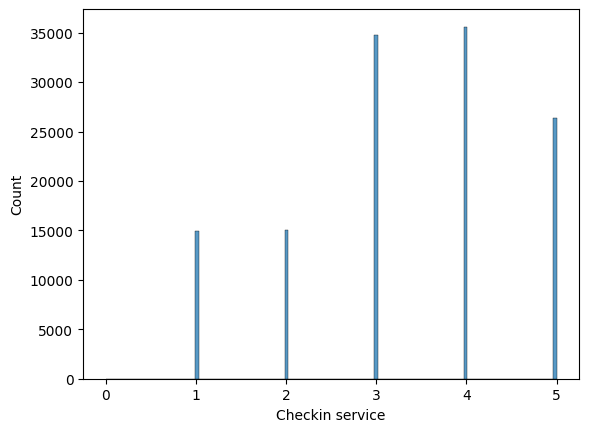

In [77]:
## Plotting histplot for checking service a/c to ratings
sns.histplot(df["Checkin service"])
plt.show()

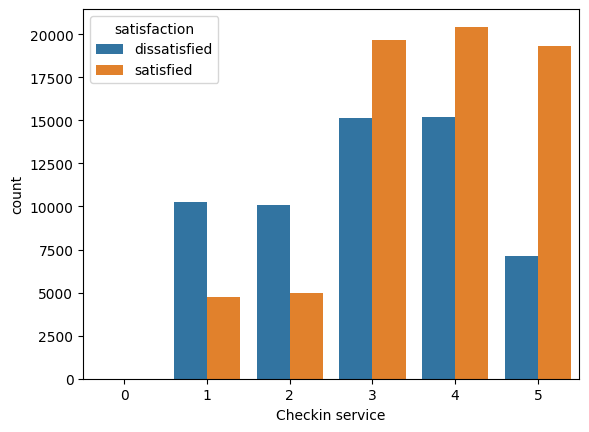

In [78]:
## Plotting countplot for checking service and satisfaction column
sns.countplot(df, x="Checkin service", hue="satisfaction")
plt.show()

* From above count plot we can say that customer who are more satisfied with checking service has given 3,4,5 rating and customers who are dissatisfied has 1,2 rating. 

<Axes: >

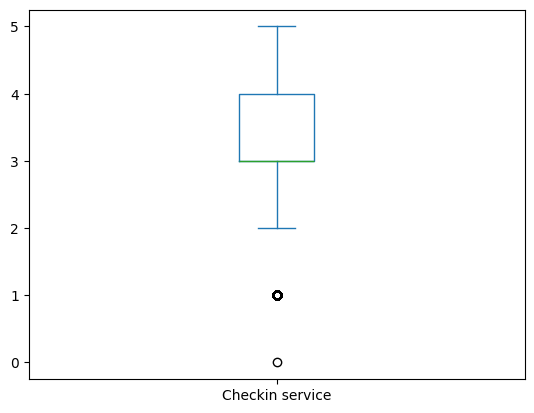

In [79]:
## Plotting box plot for checking service
df["Checkin service"].plot(kind = "box")

### 18. Working on Cleanliness column 

In [80]:
## using value_counts function to get a Series containing counts of unique values.
df["Cleanliness"].value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         3
2         4
3         1
4         2
         ..
129874    4
129875    4
129876    2
129877    3
129878    1
Name: Cleanliness, Length: 126888, dtype: int64>

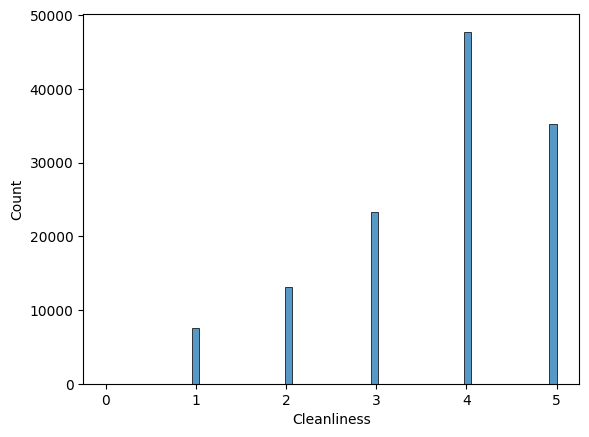

In [81]:
## Plotting hist plot for cleanliness.
sns.histplot(df["Cleanliness"])
plt.show()

In [ ]:
* From above hist plot we can see that customer have given mostly rating 4 for cleanliness.

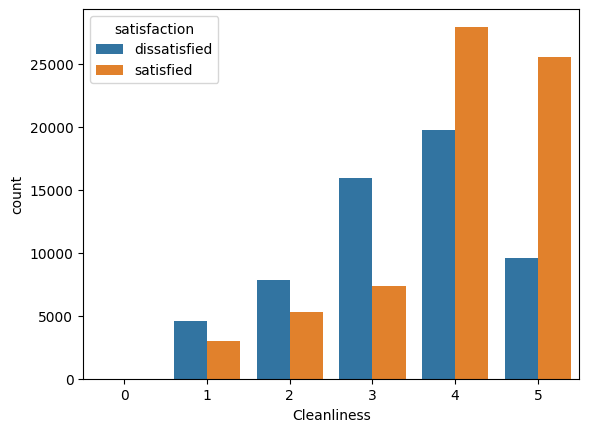

In [82]:
## Plotting countplot for cleanliness and satisfaction column
sns.countplot(df, x="Cleanliness", hue="satisfaction")
plt.show()

* Customers who are satisfied with the cleanliness has given 4 and 5 rating and customers who have given 1,2,3 rating are dissatisfied with the cleanliness.

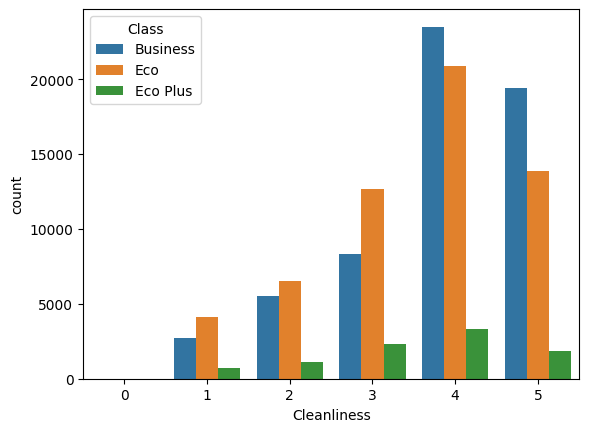

In [83]:
sns.countplot(df, x="Cleanliness", hue="Class")
plt.show()

* Most of the customers from business class has given 4 and 5 rating and from Economic class most of the customefs have given 1,2,3 ratings. 

<Axes: >

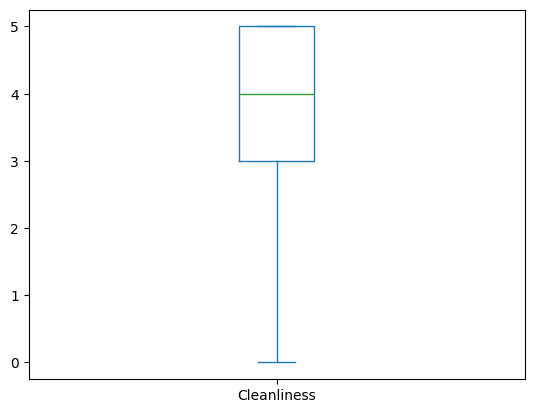

In [84]:
## Plotting box plot for cleanliness.
df["Cleanliness"].plot(kind = "box")

### 19. Working on Online boarding column 

In [85]:
## using value_counts function to get a Series containing counts of unique values.
df["Online boarding"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2
1         2
2         2
3         3
4         5
         ..
129874    2
129875    2
129876    1
129877    2
129878    2
Name: Online boarding, Length: 126888, dtype: int64>

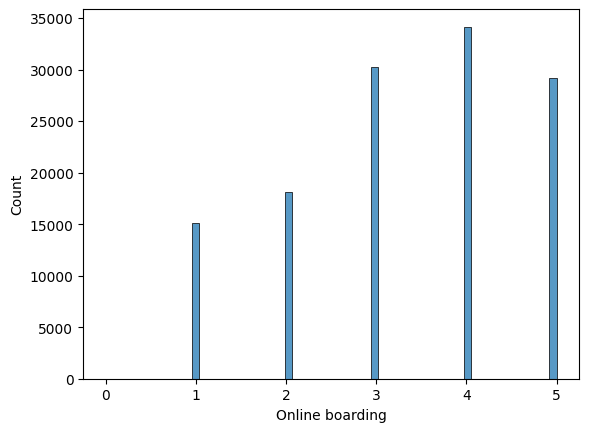

In [86]:
## Plotting hist plot for online boarding accoring to diffrent rating given by the customers.
sns.histplot(df["Online boarding"])
plt.show()

* From the above hist plot we can see that most of the customer has given 4 rating for online boarding.

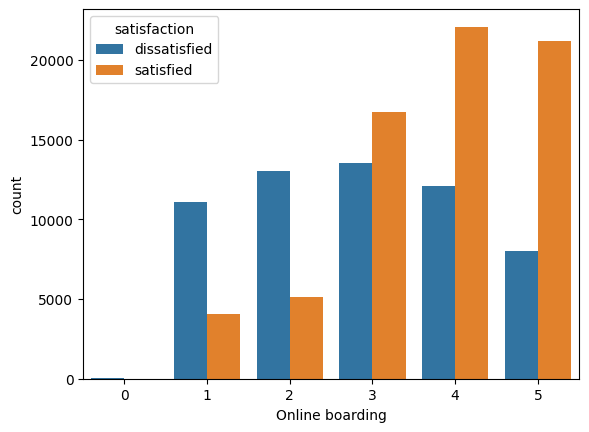

In [87]:
## Plotting count plot for onlines boarding and satisfaction column
sns.countplot(df, x="Online boarding", hue="satisfaction")
plt.show()

* From the above count plot we can say that most of the customers are satisfied and given 4 to 5 rating and customer who are not satisfied has given 1,2,3 rating. 

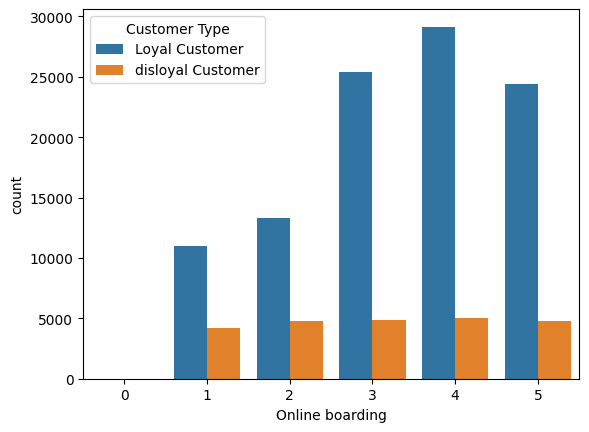

In [89]:
sns.countplot(df, x="Online boarding", hue="Customer Type")
plt.show()

## From above count plot we can say that all loyal customers have mostly given 4 and 5 rating. 

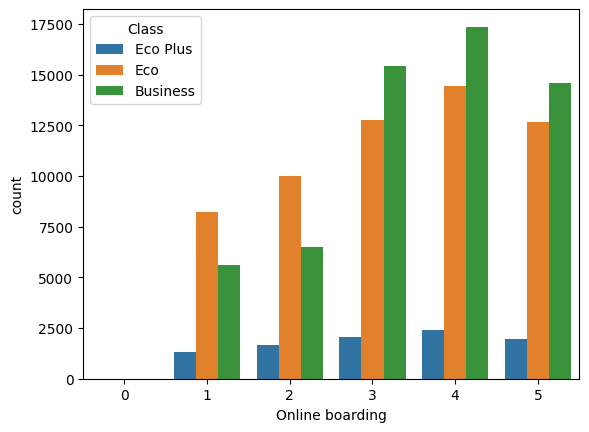

In [90]:
sns.countplot(df, x="Online boarding", hue="Class")
plt.show()

### 20. Working on  column Departure Delay in Minutes

In [91]:
## using value_counts function to get a Series containing counts of unique values.
df["Departure Delay in Minutes"].value_counts

<bound method IndexOpsMixin.value_counts of 0           0
1         310
2           0
3           0
4           0
         ... 
129874      5
129875      0
129876    174
129877    155
129878    193
Name: Departure Delay in Minutes, Length: 126888, dtype: int64>

<Axes: >

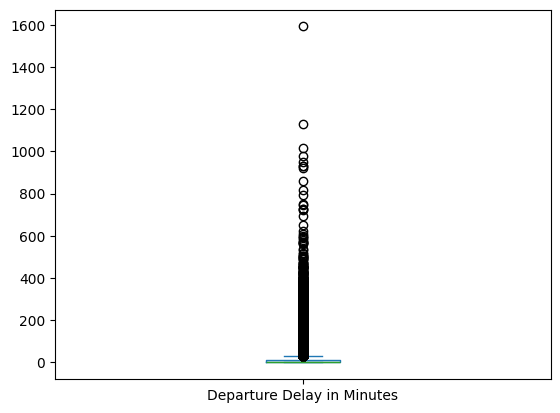

In [92]:
df["Departure Delay in Minutes"].plot.box()

In [93]:
df["Dept_Delay"] = df["Departure Delay in Minutes"]
df["Arr_Delay"] = df["Arrival Delay in Minutes"]

In [94]:
df.drop(["Departure Delay in Minutes", "Arrival Delay in Minutes"], axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126888 entries, 0 to 129878
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       126888 non-null  object 
 1   Gender                             126888 non-null  object 
 2   Customer Type                      126888 non-null  object 
 3   Age                                126888 non-null  int64  
 4   Type of Travel                     126888 non-null  object 
 5   Class                              126888 non-null  object 
 6   Flight Distance                    126888 non-null  int64  
 7   Seat comfort                       126888 non-null  int64  
 8   Departure/Arrival time convenient  126888 non-null  int64  
 9   Food and drink                     126888 non-null  int64  
 10  Gate location                      126888 non-null  int64  
 11  Inflight wifi service              126888 no

In [96]:
df["Dept_Delay"].quantile(0.9)

42.0

<Axes: >

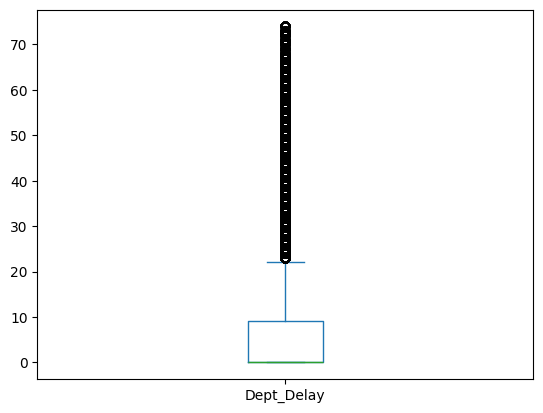

In [97]:
df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.95)]["Dept_Delay"].plot.box()

In [98]:
df = df[df["Dept_Delay"]<=df["Dept_Delay"].quantile(0.9)]

In [99]:
df.shape

(114214, 23)

<Axes: >

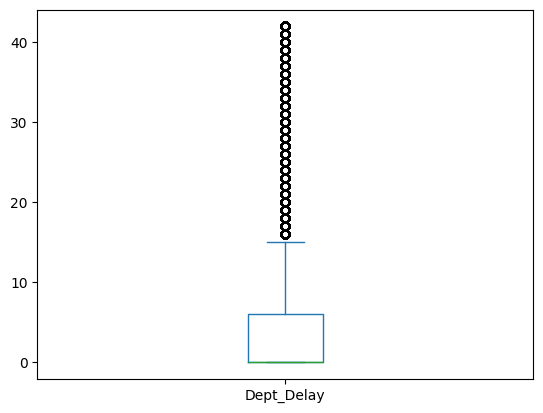

In [100]:
df["Dept_Delay"].plot(kind = "box")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114214 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       114214 non-null  object 
 1   Gender                             114214 non-null  object 
 2   Customer Type                      114214 non-null  object 
 3   Age                                114214 non-null  int64  
 4   Type of Travel                     114214 non-null  object 
 5   Class                              114214 non-null  object 
 6   Flight Distance                    114214 non-null  int64  
 7   Seat comfort                       114214 non-null  int64  
 8   Departure/Arrival time convenient  114214 non-null  int64  
 9   Food and drink                     114214 non-null  int64  
 10  Gate location                      114214 non-null  int64  
 11  Inflight wifi service              114214 no

### 21. Working on Arrival delay column

<Axes: >

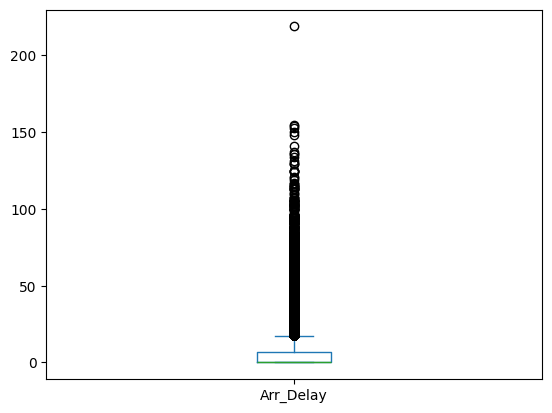

In [102]:
df["Arr_Delay"].plot.box()

<Axes: >

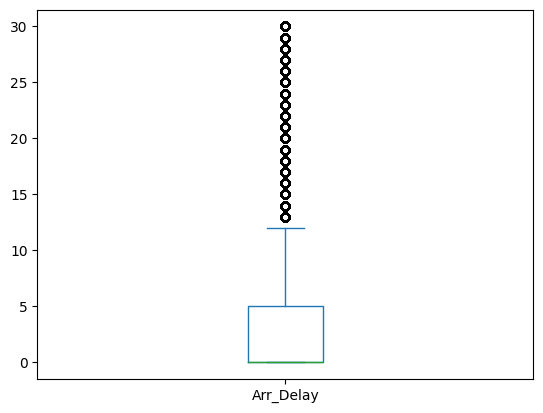

In [103]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].plot.box()

In [104]:
df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]["Arr_Delay"].shape

(108459,)

In [105]:
df = df[df["Arr_Delay"]<=df["Arr_Delay"].quantile(0.95)]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108459 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       108459 non-null  object 
 1   Gender                             108459 non-null  object 
 2   Customer Type                      108459 non-null  object 
 3   Age                                108459 non-null  int64  
 4   Type of Travel                     108459 non-null  object 
 5   Class                              108459 non-null  object 
 6   Flight Distance                    108459 non-null  int64  
 7   Seat comfort                       108459 non-null  int64  
 8   Departure/Arrival time convenient  108459 non-null  int64  
 9   Food and drink                     108459 non-null  int64  
 10  Gate location                      108459 non-null  int64  
 11  Inflight wifi service              108459 no

### 22. Working on Gate location

In [107]:
df["Gate location"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2
2         3
3         3
4         3
5         3
         ..
129869    4
129871    3
129872    3
129874    2
129875    3
Name: Gate location, Length: 108459, dtype: int64>

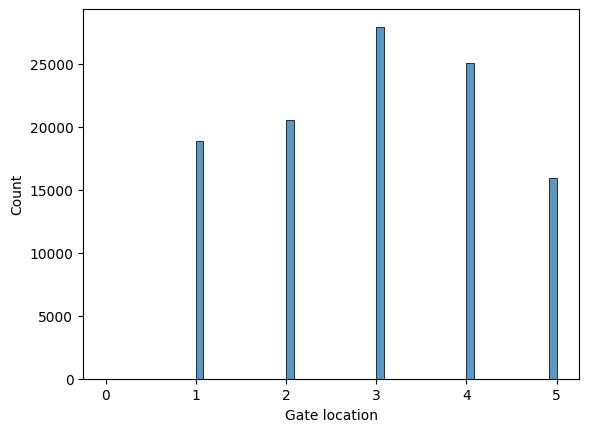

In [108]:
sns.histplot(df["Gate location"])
plt.show()

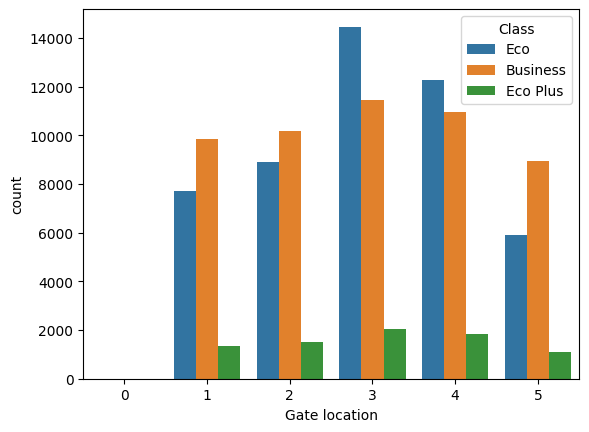

In [109]:
sns.countplot(df, x="Gate location", hue="Class")
plt.show()

<Axes: xlabel='Gate location', ylabel='count'>

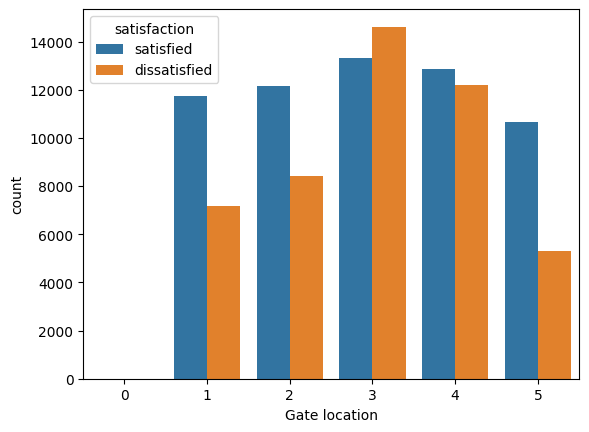

In [110]:
sns.countplot(x=df["Gate location"], hue=df["satisfaction"])

In [ ]:
* From above count plot we can say that all 

<Axes: >

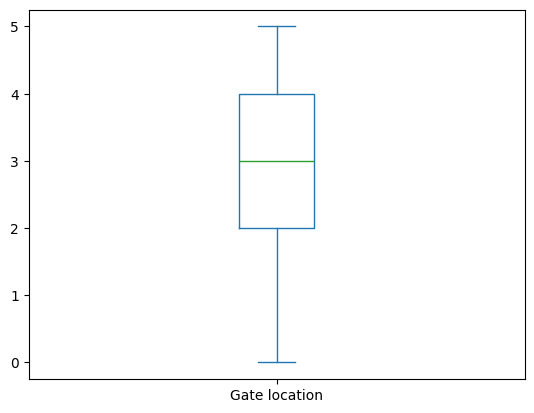

In [111]:
df["Gate location"].plot.box()

### 23. working on Inflight wifi service

<Axes: xlabel='Inflight wifi service', ylabel='count'>

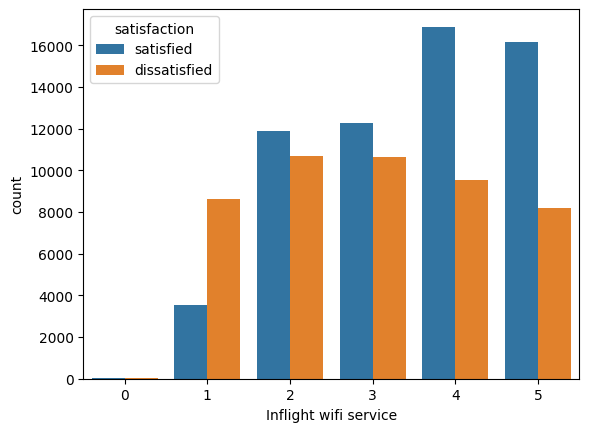

In [112]:
sns.countplot(x=df["Inflight wifi service"], hue=df["satisfaction"])

### 24.Working on Inflight entertainment

<Axes: xlabel='Inflight entertainment', ylabel='count'>

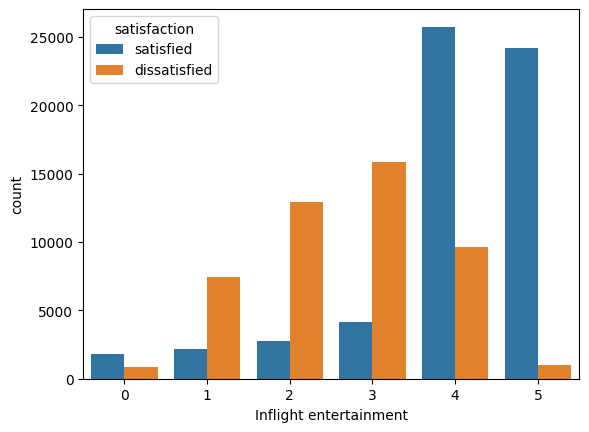

In [113]:
## Plotting count plot for inflight entertainment and satisfaction
sns.countplot(x=df["Inflight entertainment"], hue=df["satisfaction"])

* from above countplot we can say that customer who are satisfied with flight entertainment has given 4 and 5 rating and who are dissatisfied has moslty given 2,3,4 rating.

In [114]:
# checking null values
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
dtype: int64

* Working on Gender column

In [115]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


#### Encoding
* Encoding has to be done because we cant give the input to the model as object or string, It has to be converted as integer. 
* As we have the following column which has data type as object: "Gender", "Customer Type", "Type of Travel", "Class".
* Among the above mentioned columns "Class" column has to be encoded as Ordinal Encoding and remaining columns as Nominal Encoding.

In [116]:
# converting data of gender column to int data type by using get_dummies and creating new column named male
df["Male"]=pd.get_dummies(df["Gender"], dtype="int", drop_first=True)

In [117]:
# Data in Gender column is converted to 0 or 1 form in male column
df[["Gender", "Male"]]

,Gender,Male
0,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Male,1
...,...,...
129869,Female,0
129871,Female,0
129872,Female,0
129874,Female,0


In [118]:
df.drop("Gender", axis=1, inplace=True)

In [119]:
# Checking if Gender column is dropped and male column is created
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108459 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       108459 non-null  object 
 1   Customer Type                      108459 non-null  object 
 2   Age                                108459 non-null  int64  
 3   Type of Travel                     108459 non-null  object 
 4   Class                              108459 non-null  object 
 5   Flight Distance                    108459 non-null  int64  
 6   Seat comfort                       108459 non-null  int64  
 7   Departure/Arrival time convenient  108459 non-null  int64  
 8   Food and drink                     108459 non-null  int64  
 9   Gate location                      108459 non-null  int64  
 10  Inflight wifi service              108459 non-null  int64  
 11  Inflight entertainment             108459 no

* Working on Customer Type column

In [120]:
# checking unique values of customer type column
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [121]:
# converting values of customer column to 0 and 1 using lambda function and creating new column
df["Loyal_Customer"] = list(map(lambda x: 1 if x[0]=="L" else 0, df["Customer Type"]))

In [122]:
# comapring actual data with converted data
df[["Customer Type", "Loyal_Customer"]]

,Customer Type,Loyal_Customer
0,Loyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1
5,Loyal Customer,1
...,...,...
129869,disloyal Customer,0
129871,disloyal Customer,0
129872,disloyal Customer,0
129874,disloyal Customer,0


In [123]:
## dropping customer type column bz we don't need it.
df.drop("Customer Type", axis=1, inplace=True)

* Working on Type of Travel column

In [124]:
## Returns unique values of the column type of travel.
df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [125]:
# Using lambda function the encoding is done and the column name is not changed.
# As the "Customer Type" column has only two categories Personal Travel is given code 1 and Business Travel as 0.
df["Type of Travel"] = list(map(lambda x : 1 if x[0]=="P" else 0, df["Type of Travel"]))

In [126]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,Eco,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,Eco,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,Eco,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,Eco,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,Eco,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [127]:
# checking null values
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

* Working on Class column

In [154]:
## Returns unique values of class column
df["Class"].unique()

array([1, 0, 2])

In [ ]:
### Here the column "Class" has 3 categories which are ordered hence we will encode it using label Encoder of sklearn.
## label encoder -> encodes in a alphabetical manner. 

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
# calling the function labelEncoder by making an object as le
le = LabelEncoder()

In [131]:
# Assigning encoded value as 1, 2 , 3 to class column for eco, Business and ecoplus respectively.
df["Class"] = le.fit_transform(df["Class"])

In [132]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [133]:
## isna.sum will take sum of all the null values.
df.isna().sum()

satisfaction                         0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
Male                                 0
Loyal_Customer                       0
dtype: int64

In [134]:
df.head()

,satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay,Male,Loyal_Customer
0,satisfied,65,1,1,265,0,0,0,2,2,...,3,0,3,5,3,2,0,0.0,0,1
2,satisfied,15,1,1,2138,0,0,0,3,2,...,3,3,4,4,4,2,0,0.0,0,1
3,satisfied,60,1,1,623,0,0,0,3,3,...,1,0,1,4,1,3,0,0.0,0,1
4,satisfied,70,1,1,354,0,0,0,3,4,...,2,0,2,4,2,5,0,0.0,0,1
5,satisfied,30,1,1,1894,0,0,0,3,2,...,5,4,5,5,4,2,0,0.0,1,1


In [135]:
## Using lambda funcion to convert satisfied into 0 and dissatisfied as 1
new_s=list(map(lambda x:0 if x == "satisfied" else 1,df["satisfaction"]))

In [136]:
df["satisfaction"]=new_s

In [137]:
# Assigning all columns except "satisfaction" as input and "satisfaction" column as output.
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [138]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [139]:
# spliting the data as X_train, y_train for training and X-test, y_test as testing.
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=98)

In [140]:
# importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [141]:
# calling the LogisticRegression function by making an object called model.
model = LogisticRegression()

In [142]:
# fitting the model using training data
model.fit(X_train, y_train)

LogisticRegression()

In [143]:
# Predicting the Target Value for input test data (X_test)
y_pred = model.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [145]:
# Calculating Accuracy Score
accuracy_score(y_test, y_pred)

0.7876452148257422

In [146]:
# Determining Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[13031,  2134],
       [ 3624,  8326]], dtype=int64)

In [147]:
# Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     15165
           1       0.80      0.70      0.74     11950

    accuracy                           0.79     27115
   macro avg       0.79      0.78      0.78     27115
weighted avg       0.79      0.79      0.79     27115



In [148]:
## importing roc_aur_score, roc_aur_score
from sklearn.metrics import roc_auc_score, roc_curve

In [149]:
## predicting class probabilty 
y_pred_prob = model.predict_proba(X_test)

In [150]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_prob[:,1])

In [151]:
auc_score = roc_auc_score(y_test, y_pred_prob[:,1])

In [152]:
auc_score

0.8639450286734347

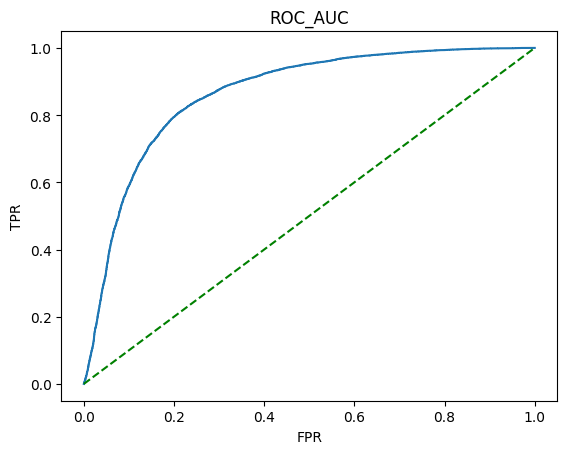

In [153]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"g--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC")
plt.show()